# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Steven F Handoko
- **Email:** stevenfh30@gmail.com
- **ID Dicoding:** stevenfh

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana musim memengaruhi jumlah penyewaan sepeda?
(Pertanyaan ini bertujuan untuk memahami faktor musim yang paling signifikan mempengaruhi permintaan sepeda. Informasi ini krusial untuk manajemen inventaris dan penyesuaian pada musim yang akan datang atau sedang berlangsung)

Data yang Dibutuhkan:
* season: Informasi musim ( berbentuk numerik 1-4 dan akan diubah menjadi Spring, Summer, Fall, Winter sesaui deskripsi data) *(1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)*.
* cnt (atau total_rentals): Jumlah total penyewaan.


---


- Pertanyaan 2 : Bagaimana perbedaan pola penyewaan per jam antara pengguna kasual dan terdaftar? (bertujuan untuk emahami perbedaan antara pengguna kasual dan terdaftar ,penting untuk mengembangkan strategi pemasaran ke target pelanggan yang efektif.)
Data yang dibutuhkan:

* casual_replaced_upper: Jumlah penyewaan oleh pengguna kasual (setelah penanganan outlier).
* registered: Jumlah penyewaan oleh pengguna terdaftar.
* dteday: Tanggal.
* hr: Jam (0-23).
* weekday: Hari dalam seminggu (0=Minggu, 6=Sabtu).

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/StevErorr/Project-Data-Analysis/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/StevErorr/Project-Data-Analysis/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap ini kita akan menge-load (memuat) tabel dari dataset.
- Sebelumnya saya membuat folder bernama "data" di github kemudian dataset yang digunakan yaitu day.csv dan hour.csv diinputkan ke dalamnya.
- Selanjutnya kita memuat tabel day dan hour dalam format csv menggunakan link github dataset dengan code diatas serta menampilkan 5 data teratas.

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


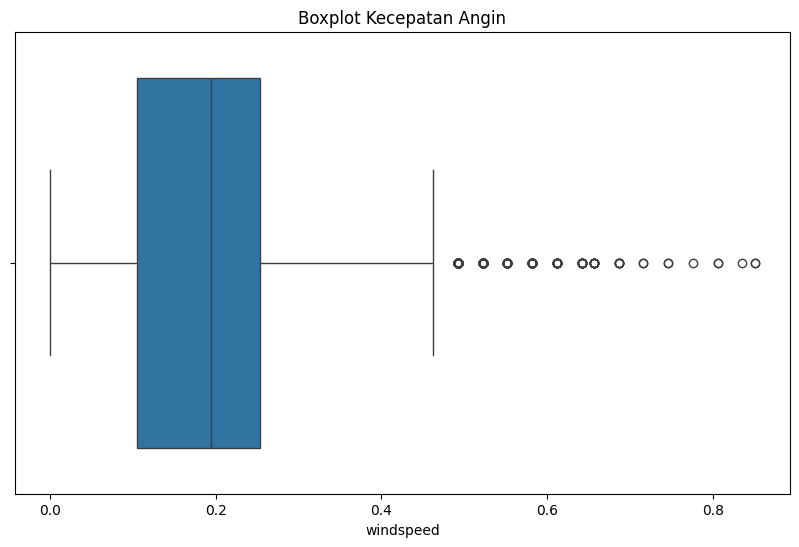

In [8]:
# Melihat outlier windspeed dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=hour_df['windspeed'])
plt.title('Boxplot Kecepatan Angin')
plt.show()

In [9]:
# Contoh penggunaan IQR untuk windspeed
Q1 = hour_df['windspeed'].quantile(0.25)
Q3 = hour_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
outliers = hour_df[(hour_df['windspeed'] < Q1 - 1.5 * IQR) | (hour_df['windspeed'] > Q3 + 1.5 * IQR)]
print("\nJumlah outlier kecepatan angin berdasarkan IQR:", len(outliers))


Jumlah outlier kecepatan angin berdasarkan IQR: 342


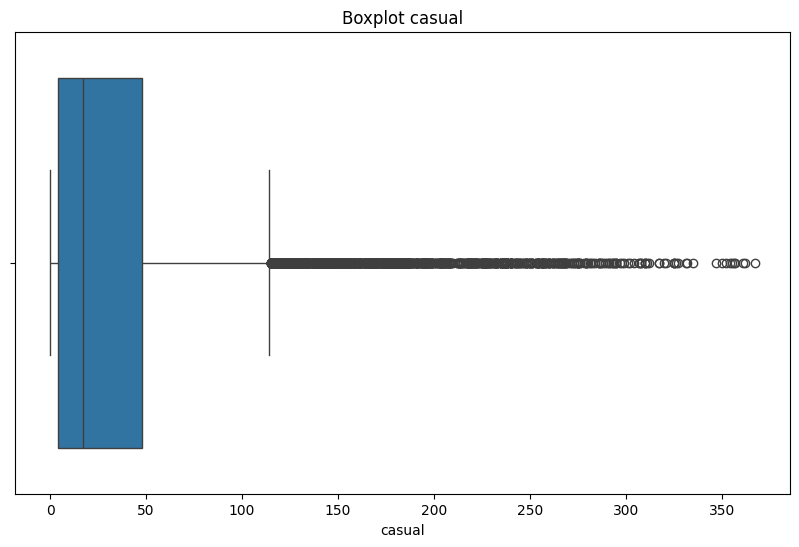

In [10]:
# Melihat outlier casual dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=hour_df['casual'])
plt.title('Boxplot casual')
plt.show()

In [11]:
# Contoh penggunaan IQR untuk casual
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1
outliers = hour_df[(hour_df['casual'] < Q1 - 1.5 * IQR) | (hour_df['casual'] > Q3 + 1.5 * IQR)]
print("\nJumlah outlier casual berdasarkan IQR:", len(outliers))


Jumlah outlier casual berdasarkan IQR: 1192


In [12]:
# Melihat nilai-nilai outlier casual
Q1_casual = hour_df['casual'].quantile(0.25)
Q3_casual = hour_df['casual'].quantile(0.75)
IQR_casual = Q3_casual - Q1_casual
outliers_casual = hour_df[(hour_df['casual'] < Q1_casual - 1.5 * IQR_casual) | (hour_df['casual'] > Q3_casual + 1.5 * IQR_casual)]

print("\nNilai-nilai outlier casual:")
print(outliers_casual['casual'])


Nilai-nilai outlier casual:
1633     144
1634     149
1635     124
1771     126
1772     174
        ... 
16817    122
16818    148
16819    164
16820    167
16821    139
Name: casual, Length: 1192, dtype: int64


**Insight:**
- Pada data day.csv terdapat beberapa kesalahan :
1.   Tipe data dteday adalah object sedangkan harusnya adalah date time.

- Pada data hour.csv terdapat beberapa kesalahan :
1.   Tipe data dteday adalah object sedangkan harusnya adalah date time.
2.   Terdapat kesalahan nilai max pada kolom windspeed yaitu 0,507 dengan mean 0,190 dan mediannya 0,194. Range yang terlalu jauh ini menunjukkan adanya indikasi outlier.
3.  Pada kolom casual terdapat perbedaan yang signifikan antara nilai 75% dengan nilai maksimum yang mengindikasikan adanya outlier.

Note : pada tahap ini juga menggunakan boxplot dan nilai IQR(Interquartil) untuk melihat outlier.

### Cleaning Data

**Cleaning data day.csv**


In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Cleaning data hour.csv**

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
#Menampilkan nilai max windpeed
hour_df[hour_df.windspeed == hour_df.windspeed.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4315,4316,2011-07-03,3,0,7,17,0,0,0,3,0.8,0.7424,0.49,0.8507,181,177,358
4316,4317,2011-07-03,3,0,7,18,0,0,0,3,0.8,0.7424,0.49,0.8507,74,107,181


In [16]:
# Menghitung Q1, Q3, dan IQR
Q1 = hour_df['windspeed'].quantile(0.25)
Q3 = hour_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Menghitung Batas Atas IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
# Membuat kolom BARU dengan outlier yang diganti
hour_df['windspeed_replaced_upper'] = hour_df['windspeed'].clip(upper=upper_bound)

In [19]:
# Menampilkan informasi dan perbandingan
print("Statistik windspeed SEBELUM penanganan outlier:")
print(hour_df['windspeed'].describe())

print("\nStatistik windspeed SETELAH penanganan outlier (diganti dengan Batas Atas):")
print(hour_df['windspeed_replaced_upper'].describe())

print(f"\nBatas Atas IQR: {upper_bound}")
print(f"Jumlah outlier yang diganti: {(hour_df['windspeed'] > upper_bound).sum()}")

Statistik windspeed SEBELUM penanganan outlier:
count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

Statistik windspeed SETELAH penanganan outlier (diganti dengan Batas Atas):
count    17379.000000
mean         0.188691
std          0.118197
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.477500
Name: windspeed_replaced_upper, dtype: float64

Batas Atas IQR: 0.4775
Jumlah outlier yang diganti: 342


In [20]:
# Contoh menampilkan baris yang diubah
outliers = hour_df[hour_df['windspeed'] > upper_bound]
print("\nContoh beberapa baris data yang diubah:")
print(outliers[['windspeed', 'windspeed_replaced_upper']].head())


Contoh beberapa baris data yang diubah:
     windspeed  windspeed_replaced_upper
175     0.4925                    0.4775
178     0.5522                    0.4775
194     0.5224                    0.4775
196     0.5224                    0.4775
265     0.5821                    0.4775


In [21]:
# Memastikan tidak ada lagi nilai di atas batas atas
print("\nMemastikan tidak ada nilai di atas batas atas setelah penggantian:")
print((hour_df['windspeed_replaced_upper'] > upper_bound).sum())


Memastikan tidak ada nilai di atas batas atas setelah penggantian:
0


In [22]:
# Melihat nilai windspeed_replaced_upper
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windspeed_replaced_upper
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.188691
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.104500
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.194000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.253700
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,0.477500
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.118197


In [23]:
#Menampilkan nilai max casual
hour_df[hour_df.casual == hour_df.casual.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windspeed_replaced_upper
10477,10478,2012-03-17,1,1,3,16,0,6,0,1,0.64,0.6212,0.5,0.0,367,318,685,0.0


In [24]:
# Menghitung Q1, Q3, dan IQR
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
# Menghitung Batas Atas IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
# Membuat Kolom BARU dengan Outlier yang Diganti
hour_df['casual_replaced_upper'] = hour_df['casual'].clip(upper=upper_bound)

In [27]:
# Menampilkan informasi dan perbandingan
print("Statistik casual SEBELUM penanganan outlier:")
print(hour_df['casual'].describe())

print("\nStatistik casual SETELAH penanganan outlier (diganti dengan Batas Atas IQR):")
print(hour_df['casual_replaced_upper'].describe())

print(f"\nBatas Atas IQR: {upper_bound}")
print(f"Jumlah outlier yang diganti: {(hour_df['casual'] > upper_bound).sum()}")

Statistik casual SEBELUM penanganan outlier:
count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

Statistik casual SETELAH penanganan outlier (diganti dengan Batas Atas IQR):
count    17379.000000
mean        31.158812
std         34.813147
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        114.000000
Name: casual_replaced_upper, dtype: float64

Batas Atas IQR: 114.0
Jumlah outlier yang diganti: 1192


In [28]:
# Contoh Data yang Diubah (Opsional)
outliers = hour_df[hour_df['casual'] > upper_bound]
print("\nContoh beberapa baris data yang diubah:")
print(outliers[['casual', 'casual_replaced_upper']].head())


Contoh beberapa baris data yang diubah:
      casual  casual_replaced_upper
1633     144                    114
1634     149                    114
1635     124                    114
1771     126                    114
1772     174                    114


In [29]:
# Memastikan Tidak Ada Lagi Nilai Di Atas Batas Atas
print("\nMemastikan tidak ada nilai di atas batas atas setelah penggantian:")
print((hour_df['casual_replaced_upper'] > upper_bound).sum())


Memastikan tidak ada nilai di atas batas atas setelah penggantian:
0


In [30]:
# Melihat nilai casual_replaced_upper
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windspeed_replaced_upper,casual_replaced_upper
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.188691,31.158812
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.104500,4.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.194000,17.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.253700,48.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,0.477500,114.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.118197,34.813147


**Insight:**
- Pada data day.csv :
1.   Tipe data dteday telah diubah ke date time.

- Pada data hour.csv :
1.   Tipe data dteday telah diubah ke date time.
2.   Nilai outlier pada kolom windspeed telah diagnti dengan nilai batas atas IQR. Dimana semua nilai diatas batas atas IQR akan diganti dengan nilai batas atas IQR. Kemudian dibuat kolom baru bernama windspeed_replaced_upper untuk menampung data yang sudah dihilangkan outliernya.
3.   Nilai outlier pada kolom casual telah diagnti dengan nilai batas atas IQR. Dimana semua nilai diatas batas atas IQR akan diganti dengan nilai batas atas IQR. Kemudian dibuat kolom baru bernama casual_replaced_upper untuk menampung data yang sudah dihilangkan outliernya.

Note :     
*   Nilai batas atas IQR dipilih sebagai pengganti outlier *windspeed* dan *casual* karena untuk mempertahankan sebaran/variasi data dalam batas yang wajar dan mencegah nilai ekstrem(lebih dari batas atas) mendominasi analisis.
* Kolom baru dibuat sebagai perbandingan dengan kolom lama dan untuk mempertahankan data yang asli. (Hal ini bersifat opsional).


## Exploratory Data Analysis (EDA)

### Explore ...

Explore data day.csv (Pertanyaan 1)

Pertanyaan 1 : Bagaimana musim memengaruhi jumlah penyewaan sepeda? (Pertanyaan ini bertujuan untuk memahami faktor musim yang paling signifikan mempengaruhi permintaan sepeda. Informasi ini krusial untuk manajemen inventaris dan penyesuaian pada musim yang akan datang atau sedang berlangsung)
Data yang Dibutuhkan:

* season: Informasi musim ( berbentuk numerik 1-4 dan akan diubah menjadi Spring, Summer, Fall, Winter sesaui deskripsi data) (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
* cnt (atau total_rentals): Jumlah total penyewaan.

In [31]:
# Membuat kolom baru bernama season_new untuk kemudian diisi dengan nama season sesuai dari kolom season
# KETENTUAN :
# 1: Spring
# 2: Summer
# 3: Fall
# 4: Winter

day_df['season_new'] = day_df['season'].apply(lambda x: {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}.get(x))


In [32]:
# Mengganti nama kolom 'cnt' menjadi 'total_rentals'
day_df.rename(columns={'cnt': 'total_rentals'}, inplace=True)

In [33]:
# 1. Distribusi Jumlah Penyewaan secara Keseluruhan
print("Distribusi Jumlah Penyewaan (Statistik Deskriptif):")
print(day_df['total_rentals'].describe())
print("\n")

Distribusi Jumlah Penyewaan (Statistik Deskriptif):
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: total_rentals, dtype: float64




In [34]:
# 2. Statistik Deskriptif per Musim (Menggunakan season_new)
print("Statistik Deskriptif per Musim:")
print(day_df.groupby('season_new')['total_rentals'].describe())
print("\n")

Statistik Deskriptif per Musim:
            count         mean          std     min     25%     50%      75%  \
season_new                                                                     
Fall        188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
Spring      181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
Summer      184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
Winter      178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

               max  
season_new          
Fall        8714.0  
Spring      7836.0  
Summer      8362.0  
Winter      8555.0  




In [35]:
# 3. Rata-rata dan Median Penyewaan per Musim (Lebih Ringkas)
print("Rata-rata dan Median Penyewaan per Musim:")
print(day_df.groupby('season_new')['total_rentals'].agg(['mean', 'median']))
print("\n")

Rata-rata dan Median Penyewaan per Musim:
                   mean  median
season_new                     
Fall        5644.303191  5353.5
Spring      2604.132597  2209.0
Summer      4992.331522  4941.5
Winter      4728.162921  4634.5




In [36]:
# 4. Total Penyewaan per Musim
print("Total Penyewaan per Musim:")
print(day_df.groupby('season_new')['total_rentals'].sum())
print("\n")

Total Penyewaan per Musim:
season_new
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: total_rentals, dtype: int64




In [37]:
# 5. Jumlah Hari per Musim
print("Jumlah Hari per Musim:")
print(day_df['season_new'].value_counts())
print("\n")

Jumlah Hari per Musim:
season_new
Fall      188
Summer    184
Spring    181
Winter    178
Name: count, dtype: int64




In [38]:
# 6. Pivot Table untuk Analisis Lebih Detail
print("Pivot Table (Rata-rata Penyewaan per Musim dan Hari dalam Seminggu):")
print(day_df.pivot_table(values='total_rentals', index='season_new', columns=day_df['dteday'].dt.day_name(), aggfunc='mean'))
print("\n")

Pivot Table (Rata-rata Penyewaan per Musim dan Hari dalam Seminggu):
dteday           Friday       Monday     Saturday       Sunday     Thursday  \
season_new                                                                    
Fall        5750.629630  5627.192308  5584.962963  5324.269231  5698.607143   
Spring      2856.307692  2452.730769  2432.333333  2229.444444  2894.200000   
Summer      5222.769231  4565.000000  5334.192308  4986.538462  5200.269231   
Winter      4898.680000  4698.846154  4906.040000  4451.961538  4730.880000   

dteday          Tuesday    Wednesday  
season_new                            
Fall        5656.111111  5853.851852  
Spring      2792.520000  2611.080000  
Summer      4824.961538  4835.074074  
Winter      4658.923077  4766.800000  




In [39]:
# 7. Pivot Table dengan Jumlah dan Rata-rata
print("Pivot Table (Jumlah dan Rata-rata Penyewaan per Musim):")
print(day_df.pivot_table(values='total_rentals', index='season_new', aggfunc=['sum', 'mean']))
print("\n")

Pivot Table (Jumlah dan Rata-rata Penyewaan per Musim):
                     sum          mean
           total_rentals total_rentals
season_new                            
Fall             1061129   5644.303191
Spring            471348   2604.132597
Summer            918589   4992.331522
Winter            841613   4728.162921




**Insight:**
Pertanyaan 1 (day.csv)

Berikut adalah penjelasan tentang apa yang ditampilkan oleh setiap tabel:
* Pertama adalah membuat kolom baru bernama season_new untuk kemudian diisi dengan nama season sesuai dari kolom season.
* Mengganti nama kolom 'cnt' menjadi 'total_rentals'
* Menampilkan distribusi Jumlah Penyewaan (Statistik Deskriptif): Tabel ini memberikan ringkasan statistik deskriptif dari kolom total_rentals secara keseluruhan.
* Menampilkan statistik deskriptif per musim. Tabel ini memberikan ringkasan statistik deskriptif yang sama seperti di atas, tetapi dipecah berdasarkan musim (season_new). Ini memungkinkan Anda untuk membandingkan distribusi penyewaan di musim yang berbeda. Misalnya, Anda dapat melihat musim mana yang memiliki rata-rata penyewaan tertinggi atau variasi penyewaan terbesar.
* Menampilkan rata-rata dan median penyewaan per musim. Tabel ini menampilkan rata-rata (mean) dan median penyewaan untuk setiap musim. Membandingkan rata-rata dan median dapat memberikan wawasan tentang skewness (kemiringan) distribusi. Jika rata-rata jauh lebih tinggi dari median, distribusinya cenderung right-skewed (miring ke kanan), yang berarti ada beberapa nilai yang sangat tinggi yang menarik rata-rata ke atas.
* Menampilkan total Penyewaan per Musim. Tabel ini menunjukkan jumlah total penyewaan untuk setiap musim. Ini memberikan gambaran tentang musim mana yang paling populer dalam hal total volume penyewaan.

* Menampilkan jumlah hari per musim. Tabel ini menunjukkan jumlah hari yang termasuk dalam setiap musim. Ini penting untuk interpretasi yang akurat dari tabel lain. Misalnya, jika satu musim memiliki total penyewaan yang lebih tinggi tetapi juga memiliki jumlah hari yang lebih banyak, ini mungkin hanya karena durasinya yang lebih panjang, bukan karena popularitas yang lebih tinggi per hari.
* Pivot Table (Rata-rata Penyewaan per Musim dan Hari dalam Seminggu). Tabel ini menunjukkan rata-rata penyewaan untuk setiap kombinasi musim dan hari dalam seminggu. Ini memungkinkan Anda untuk melihat pola musiman dalam penyewaan berdasarkan hari dalam seminggu. Misalnya, Anda dapat melihat apakah ada hari-hari tertentu dalam seminggu yang secara konsisten lebih populer di musim tertentu.
* Pivot Table (Jumlah dan Rata-rata Penyewaan per Musim).Tabel ini menampilkan total (sum) dan rata-rata (mean) penyewaan untuk setiap musim. Ini memberikan ringkasan yang ringkas dari total volume dan rata-rata harian penyewaan per musim.


Explore data hour.csv (Pertanyaan 2)

Pertanyaan 2 : Bagaimana perbedaan pola penyewaan per jam  antara pengguna kasual dan terdaftar? (bertujuan untuk emahami perbedaan antara pengguna kasual dan terdaftar ,penting untuk mengembangkan strategi pemasaran ke target pelanggan yang efektif.)
Data yang dibutuhkan:

* casual_replaced_upper: Jumlah penyewaan oleh pengguna kasual (setelah penanganan outlier).
* registered: Jumlah penyewaan oleh pengguna terdaftar.
* dteday: Tanggal.
* hr: Jam (0-23).
* weekday: Hari dalam seminggu (0=Minggu, 6=Sabtu).

Note : gunakan kolom casual_replaced_upper yang telah di wrangling

In [40]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windspeed_replaced_upper,casual_replaced_upper
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.188691,31.158812
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.104500,4.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.194000,17.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.253700,48.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,0.477500,114.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.118197,34.813147


In [41]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   instant                   17379 non-null  int64         
 1   dteday                    17379 non-null  datetime64[ns]
 2   season                    17379 non-null  int64         
 3   yr                        17379 non-null  int64         
 4   mnth                      17379 non-null  int64         
 5   hr                        17379 non-null  int64         
 6   holiday                   17379 non-null  int64         
 7   weekday                   17379 non-null  int64         
 8   workingday                17379 non-null  int64         
 9   weathersit                17379 non-null  int64         
 10  temp                      17379 non-null  float64       
 11  atemp                     17379 non-null  float64       
 12  hum               

In [42]:
# 1. Statistik Deskriptif Dasar
print("1. Statistik Deskriptif Pengguna Kasual (Setelah Penanganan Outlier):\n", hour_df['casual_replaced_upper'].describe())
print("\nStatistik Deskriptif Pengguna Terdaftar:\n", hour_df['registered'].describe())

1. Statistik Deskriptif Pengguna Kasual (Setelah Penanganan Outlier):
 count    17379.000000
mean        31.158812
std         34.813147
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        114.000000
Name: casual_replaced_upper, dtype: float64

Statistik Deskriptif Pengguna Terdaftar:
 count    17379.000000
mean       153.786869
std        151.357286
min          0.000000
25%         34.000000
50%        115.000000
75%        220.000000
max        886.000000
Name: registered, dtype: float64


In [43]:
# 2. Rata-rata dan Median Penyewaan
print("\n2. Rata-rata dan Median Penyewaan:")
print(hour_df[['casual_replaced_upper', 'registered']].agg(['mean', 'median']))


2. Rata-rata dan Median Penyewaan:
        casual_replaced_upper  registered
mean                31.158812  153.786869
median              17.000000  115.000000


In [44]:
# 3. Analisis Rata-Rata per Jam
hourly_avg = hour_df.groupby('hr')[['casual_replaced_upper', 'registered']].mean()
print("\n3. Rata-rata Penyewaan per Jam:\n", hourly_avg)


3. Rata-rata Penyewaan per Jam:
     casual_replaced_upper  registered
hr                                   
0               10.158402   43.739669
1                6.504144   26.871547
2                4.772028   18.097902
3                2.715925    9.011478
4                1.253945    5.098996
5                1.411437   18.478382
6                4.161379   71.882759
7               11.055021  201.009629
8               21.679505  337.331499
9               30.763411  188.418157
10              43.572215  127.191197
11              51.499312  148.602476
12              55.480769  185.021978
13              56.814815  181.352538
14              59.030178  165.381344
15              58.844993  176.327846
16              59.315068  238.238356
17              62.389041  387.178082
18              55.232143  364.390110
19              46.140110  262.752747
20              35.674451  189.796703
21              27.995879  144.059066
22              22.167582  109.082418
23              

In [45]:
# 4. Proporsi penyewaan antara casual dan registered (Menggunakan cnt)
if 'cnt' in hour_df.columns:
    total_casual_replaced = hour_df['casual_replaced_upper'].sum()
    total_registered = hour_df['registered'].sum()
    print(f"\n4. Proporsi Penyewaan Kasual (Setelah Penanganan Outlier): {total_casual_replaced / (total_casual_replaced + total_registered) * 100:.2f}%")
    print(f"Proporsi Penyewaan Terdaftar: {total_registered / (total_casual_replaced + total_registered) * 100:.2f}%")


4. Proporsi Penyewaan Kasual (Setelah Penanganan Outlier): 16.85%
Proporsi Penyewaan Terdaftar: 83.15%


**Insight:**
Pertanyaan 2 (hour.csv)
* Menampilkan statistik deskriptif dari kolom casual_replaced_upper (pengguna kasual setelah penanganan outlier) dan registered (pengguna terdaftar). Membandingkan statistik ini antara pengguna kasual dan terdaftar memberikan gambaran awal perbedaan perilaku. Contoh: jika rata-rata pengguna terdaftar lebih tinggi, mereka cenderung menyewa lebih banyak sepeda.
* Menampilkan rata-rata (mean) dan median penyewaan untuk pengguna kasual dan terdaftar secara bersamaan. Membandingkan rata-rata dan median mengidentifikasi skewness (kemiringan) distribusi data. Jika rata-rata jauh lebih besar dari median, distribusinya right-skewed (miring ke kanan), menunjukkan adanya nilai-nilai ekstrem yang tinggi.
* Menghitung rata-rata penyewaan hanya berdasarkan jam. Ini mengabaikan hari dalam seminggu. Menunjukkan rata-rata penyewaan untuk setiap jam dalam sehari, secara umum. Anda dapat melihat jam-jam dengan permintaan tertinggi dan terendah.
* Menghitung proporsi total penyewaan yang berasal dari pengguna kasual dan terdaftar. Memberikan gambaran tentang kontribusi relatif masing-masing kelompok pengguna terhadap total penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

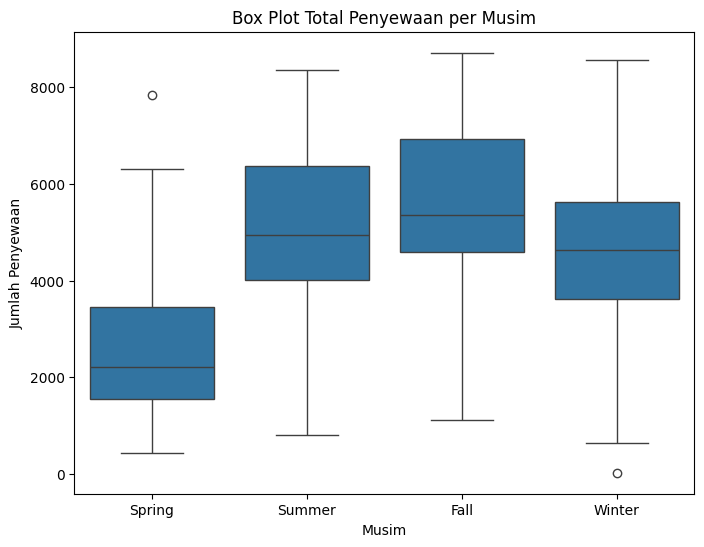

In [46]:
# 1. Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='season_new', y='total_rentals', data=day_df)
plt.title('Box Plot Total Penyewaan per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

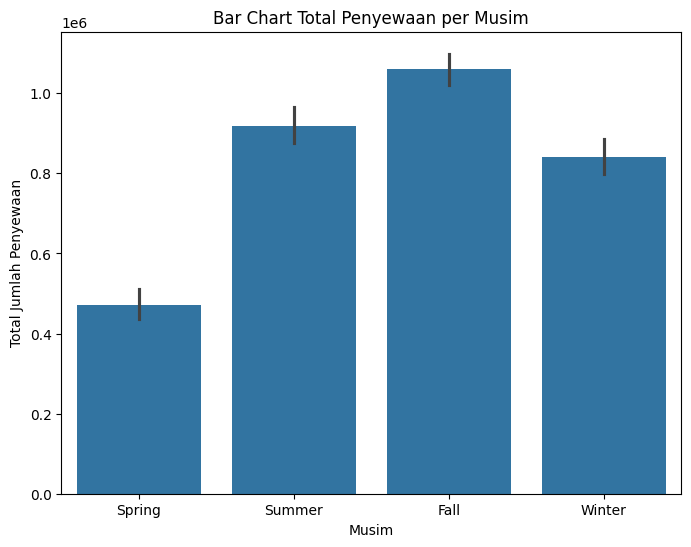

In [47]:
# 2. Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x='season_new', y='total_rentals', data=day_df, estimator='sum') #estimator='sum' penting untuk total
plt.title('Bar Chart Total Penyewaan per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Jumlah Penyewaan')
plt.show()

  season_new  total_rentals
0       Fall        1061129
1     Spring         471348
2     Summer         918589
3     Winter         841613


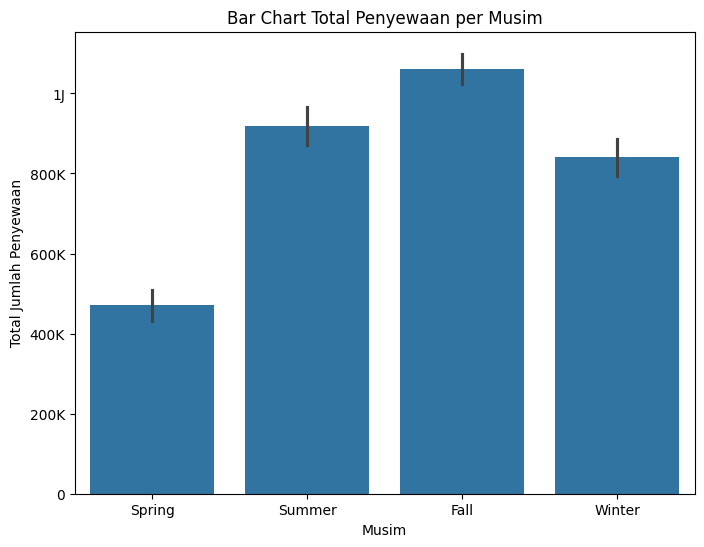

In [48]:
# BERIKUT UNTUK MENAMPILKAN BAR CHART DENGAN NILAI SKALA RATUSAN RIBU-JUTAAN BERDASARKAN DARI PIVOT TABEL DI TAHAP EDA

total_penyewaan_per_musim = day_df.groupby('season_new')['total_rentals'].sum().reset_index()
print(total_penyewaan_per_musim)


def format_angka(x, pos):
    if x >= 1000000:
        return '%1.0fJ' % (x * 1e-6)
    elif x >= 1000:
        return '%1.0fK' % (x * 1e-3)
    else:
        return '%1.0f' % x # Tambahan: format angka di bawah 1000

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='season_new', y='total_rentals', data=day_df, estimator='sum')
plt.title('Bar Chart Total Penyewaan per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Jumlah Penyewaan')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_angka))

plt.show()

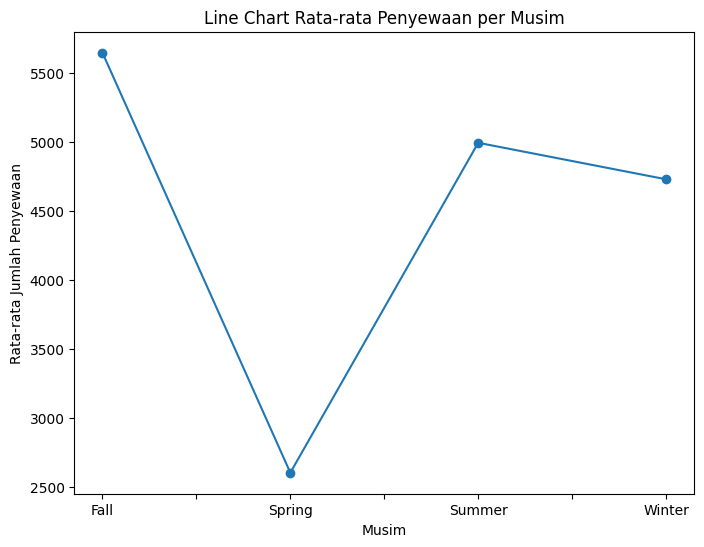

In [49]:
# 3. Line Chart
plt.figure(figsize=(8, 6))
day_df.groupby('season_new')['total_rentals'].mean().plot(marker='o')
plt.title('Line Chart Rata-rata Penyewaan per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

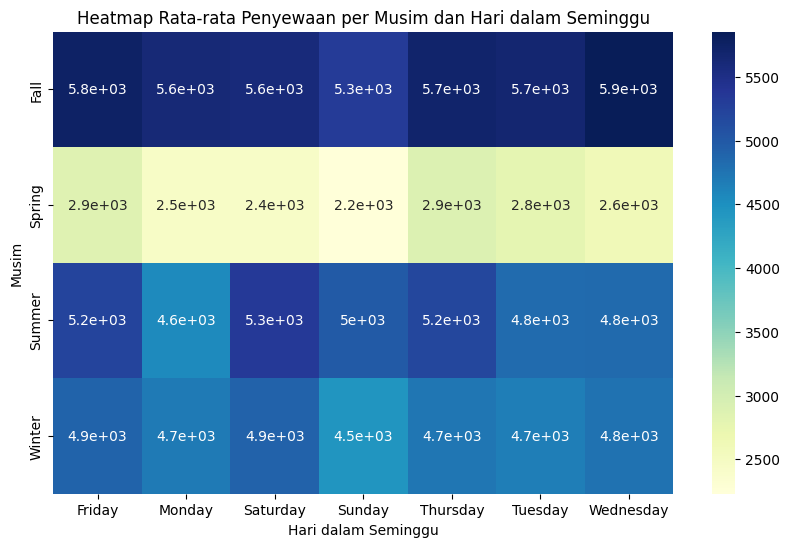

In [50]:
# 4. Heatmap
plt.figure(figsize=(10, 6))
pivot_table = day_df.pivot_table(values='total_rentals', index='season_new', columns=day_df['dteday'].dt.day_name(), aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu") #cmap untuk warna
plt.title('Heatmap Rata-rata Penyewaan per Musim dan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Musim')
plt.show()

**Insight:**
- Box plot : terlihat musim panas (summer) dan musim gugur (fall) memiliki median dan rentang penyewaan yang lebih tinggi. Dilanjutkan dengan musim dingin (winter) memiliki median penyewaan yang  tertinggi ketiga, tetapi dengan outlier (menunjukkan adanya hari-hari dengan penyewaan yang sangat rendah). Dan terakhir ada musim semi (spring) memiliki median dan rentang penyewaan terendah.
- Bar chart : terlihat total penyewaan tertinggi ada pada musim gugur(fall). Kemudian yang kedua ada musim panas(summer) , ketiga musim dingin(winter), dan keempat musim semi(spring). Juga terdapat garis vertikal diatas bar merupakan error bar. Dalam konteks ini, error bar menunjukkan variabilitas total penyewaan di setiap musim. Ukuran error bar yang relatif kecil menunjukkan bahwa total penyewaan di setiap musim cukup konsisten.
- Line char : terlihat musim gugur(fall) memiliki tingkat rata-rata penyewaan per musim tertinggi. Kemudian yang kedua dan ketiga adalah musim panas(summer) dan dngin(winter) dengan rata-rata penyewaan per musim yang berdekatan. Dan terakhir ada musim gugur(spring) dengan rata-rata penyewaan permusim paling rendah.
- Haetmap :


Berdasarkan heatmap :
- Musim gugur(fall) memiliki rata-rata penyewaan tertinggi secara keseluruhan, dengan warna biru tua yang dominan.
- Musim panas(summer) dan dingin(winter) memiliki rata-rata penyewaan kedua dan ketiga dengan jarak rata-rata penyewaan tidak terlalu jauh.  
- Musim semi(spring) memiliki rata-rata penyewaan terendah, dengan warna kuning muda yang dominan.
- Pola harian dalam seminggu relatif konsisten di setiap musim. Tidak ada perbedaan yang mencolok dalam pola harian antar musim. Artinya, tren naik turunnya penyewaan dari Senin hingga Minggu relatif sama di setiap musim, meskipun tingkat rata-rata penyewaannya berbeda.

### Pertanyaan 2:

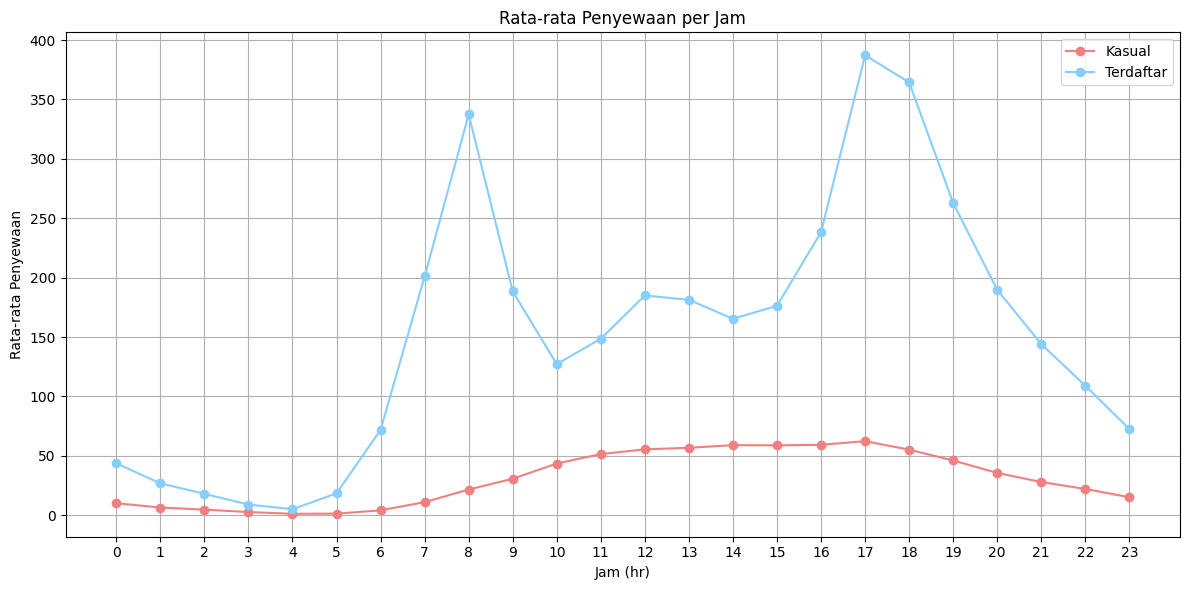

In [51]:
# 1. Grafik Garis Rata-rata Penyewaan per Jam
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg['casual_replaced_upper'], label='Kasual', marker='o', color='lightcoral')
plt.plot(hourly_avg.index, hourly_avg['registered'], label='Terdaftar', marker='o', color='lightskyblue')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Rata-rata Penyewaan per Jam')
plt.xticks(hourly_avg.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

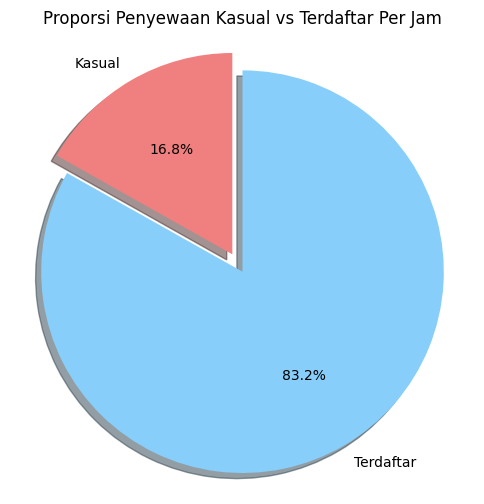

In [52]:
# 2. Pie Chart proporsi Penyewaan per Jam antara pengguna kasual dan registered
total_casual = hour_df['casual_replaced_upper'].sum()
total_registered = hour_df['registered'].sum()
total = total_casual + total_registered

if total == 0:
    print("Tidak ada data penyewaan untuk dihitung proporsinya.")
    plt.pie([1, 0], labels=["Tidak ada penyewaan", ""], autopct='', startangle=90)
    plt.title('Proporsi Penyewaan Kasual vs Terdaftar')
    plt.show()
else:
    proporsi = [total_casual / total * 100, total_registered / total * 100]
    labels = ['Kasual', 'Terdaftar']
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)

    plt.figure(figsize=(6, 6))
    plt.pie(proporsi, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Proporsi Penyewaan Kasual vs Terdaftar Per Jam')
    plt.axis('equal')
    plt.show()

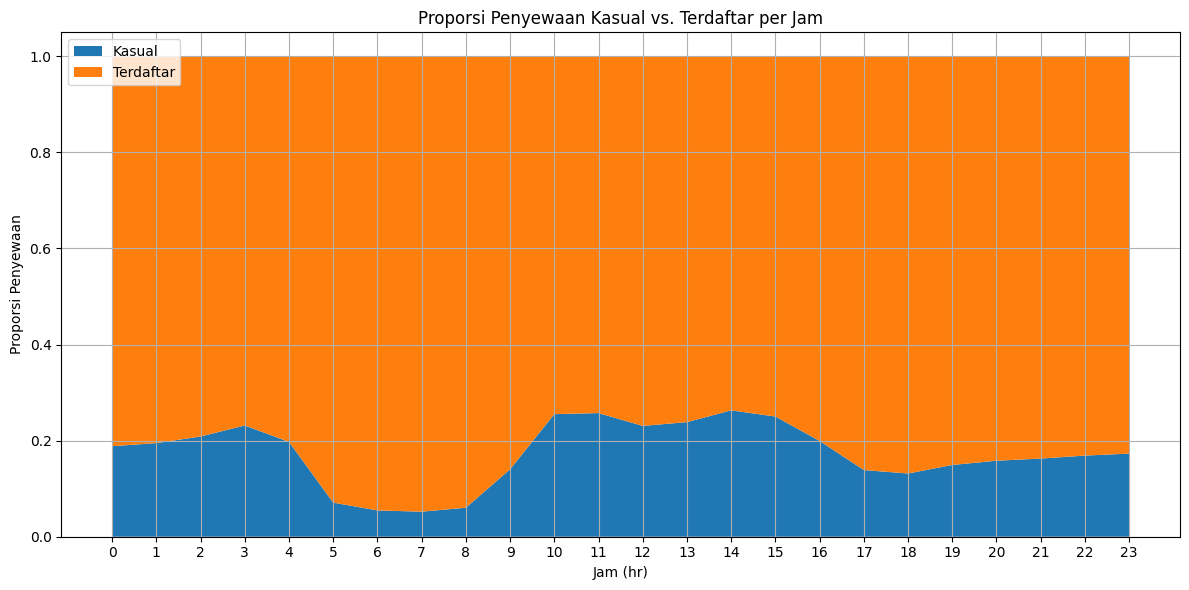

In [53]:
# 3. Grafik Area Tumpuk Proporsi Penyewaan
total_hourly = hourly_avg['casual_replaced_upper'] + hourly_avg['registered']
casual_prop = hourly_avg['casual_replaced_upper'] / total_hourly
registered_prop = hourly_avg['registered'] / total_hourly

plt.figure(figsize=(12, 6))
plt.stackplot(hourly_avg.index, [casual_prop, registered_prop], labels=['Kasual', 'Terdaftar'])
plt.xlabel('Jam (hr)')
plt.ylabel('Proporsi Penyewaan')
plt.title('Proporsi Penyewaan Kasual vs. Terdaftar per Jam')
plt.xticks(hourly_avg.index)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

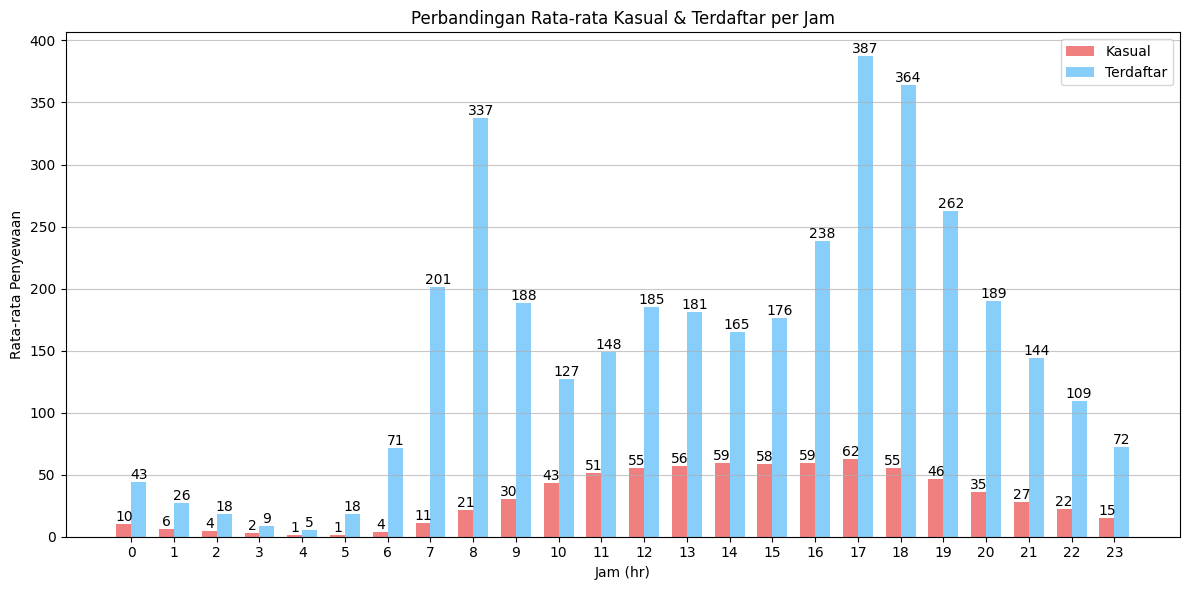

In [54]:
# 4. Bar Chart Rata-rata Penyewaan Antara Pengguna Kasual dan Terdaftar
hourly_avg = hour_df.groupby('hr')[['casual_replaced_upper', 'registered']].mean()

plt.figure(figsize=(12, 6))
x = np.arange(len(hourly_avg))
width = 0.35

plt.bar(x - width/2, hourly_avg['casual_replaced_upper'], width, label='Kasual', color='lightcoral')
plt.bar(x + width/2, hourly_avg['registered'], width, label='Terdaftar', color='lightskyblue')

plt.xticks(x, hourly_avg.index)
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Penyewaan')
plt.title('Perbandingan Rata-rata Kasual & Terdaftar per Jam')
plt.legend()

for i in x: #loop untuk label angka di atas bar
    plt.text(x[i] - width/2, hourly_avg['casual_replaced_upper'][i], int(hourly_avg['casual_replaced_upper'][i]), ha='center', va='bottom')
    plt.text(x[i] + width/2, hourly_avg['registered'][i], int(hourly_avg['registered'][i]), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Grafik rata-rata penyewaan per jam : terlihat  perbedaan pola penggunaan antara pengguna kasual dan terdaftar. Pengguna terdaftar memiliki tingkat penyewaan tinggi pada jam-jam masuk kerja, yaitu pada pagi hari sekitar pukul 8 dan jam-jam pulang kerja, yaitu pada sore hari antara pukul 17 hingga 18.
Sementara itu, pengguna kasual menunjukkan peningkatan penggunaan yang lebih bertahap dari pagi hingga siang hari, mencapai puncaknya di sore hari sekitar pukul 17, dan kemudian menurun perlahan hingga malam. Hal ini menunjukkan pengguna kasual cenderung menggunakan layanan penyewaan sepanjang hari, terutama di siang dan sore hari, kemungkinan untuk aktivitas rekreasi atau kegiatan di luar jam kerja.
- Pie chart : terlihat bahwa pengguna terdaftar(registered) per jam lebih banyak yaitu 83,2% dibandingkan pengguna casual yang hanya 16,8%.
- Grafik proporsi penyewaan pengguna kasual dan perdaftar per jam : terlihat  pengguna terdaftar mendominasi sebagian besar waktu, terutama pada jam-jam sibuk yaitu pagi dan sore hari. Sementara itu, proporsi pengguna kasual meningkat di siang hari, terutama antara pukul 10 hingga 16, meskipun tetap lebih kecil dibandingkan pengguna terdaftar. Hal ini mengindikasikan bahwa pengguna terdaftar menggunakan layanan secara konsisten sepanjang hari sementara pengguna kasual lebih banyak menggunakan layanan pada siang hari, yang kemungkinan untuk aktivitas rekreasi atau perjalanan santai.
- Bar chart : sama seperti penjealsan visualisasi sebelumnya. Terlihat rata-rata penyewaan pengguna terdaftar cenderung tinggi di pagi dan sore hari ketika jam-jam sibuk. Sedangkan rata-rata pengguna kasual cenderung rendah dan mulai meningkat dari siang sampai sore hari.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 (Bagaimana musim memengaruhi jumlah penyewaan sepeda?)

Jawaban :
Perbedaan musim yang ada akan memengaruhi jumlah penyewaan tiap musim.Berdasarkan analisis dari ketiga grafik (box plot, bar chart, dan line chart), dapat ditarik kesimpulan bahwa musim gugur merupakan musim puncak untuk penyewaan sepeda, diikuti oleh musim panas, lalu musim dingin, dan terakhir musim semi dengan permintaan terendah. Perbedaan ini kemungkinan besar dipengaruhi oleh faktor cuaca, di mana musim gugur menawarkan kondisi yang ideal untuk bersepeda. Informasi ini berguna untuk manajemen  ketersediaan sepeda, sehingga perlu dioptimalkan untuk memenuhi permintaan tinggi di musim gugur dan mengurangi jumlah sepeda yang tersedia atau menawarkan promosi di musim semi. Hal ini juga dapat memandu strategi pemasaran dan penyesuaian operasional, seperti jam operasional untuk memaksimalkan efisiensi dan pendapatan.


---


- Conclution pertanyaan 2 (Bagaimana pola perbedaan penyewaan per jam  antara pengguna kasual dan terdaftar?)

Jawaban :
Terdapat pola penyewaan per jam yang berbeda antara pengguna kasual dan terdaftar. Berdasarkan hasil analisa, pengguna terdaftar cenderung menyewa pada jam-jam sibuk dipagi hari (jam 7-8) dan sore hari(jam 16-18). Hal ini menunjukkan pola penyewaan yang mungkin memilki keterkaitan dengan waktu masuk dan pulang kerja. Sedangkan untuk pengguna kasual memiilki pola penyewaan yang tidak terjadi lonjakan signifikan, penyewaan naik perlahan dari mulai pagi hingga sore hari kemudian terjadi penurunan setelah mulai malam.



## **DOWNLOAD ALL DATA**

In [55]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dteday         731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   yr             731 non-null    int64         
 4   mnth           731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weathersit     731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  hum            731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  total_rentals  731 non-

In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   instant                   17379 non-null  int64         
 1   dteday                    17379 non-null  datetime64[ns]
 2   season                    17379 non-null  int64         
 3   yr                        17379 non-null  int64         
 4   mnth                      17379 non-null  int64         
 5   hr                        17379 non-null  int64         
 6   holiday                   17379 non-null  int64         
 7   weekday                   17379 non-null  int64         
 8   workingday                17379 non-null  int64         
 9   weathersit                17379 non-null  int64         
 10  temp                      17379 non-null  float64       
 11  atemp                     17379 non-null  float64       
 12  hum               

In [57]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals,season_new
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring


In [58]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,windspeed_replaced_upper,casual_replaced_upper
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.0,3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.0,8
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.0,5
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.0,3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.0,0


In [59]:
# Atasi kolom yang sama dengan menambahkan suffix
day_df.columns = [f'DAY_{col}' for col in day_df.columns] #menambah prefix day_ di semua nama kolom day_df
hour_df.columns = [f'HOUR_{col}' for col in hour_df.columns] #menambah prefix hour_ di semua nama kolom hour_df

In [63]:
# Hapus prefix HOUR_ pada kolom hour_dteday agar bisa di merge
hour_df = hour_df.rename(columns={'HOUR_dteday': 'dteday'})

In [64]:
print(day_df.columns)

Index(['DAY_instant', 'DAY_dteday', 'DAY_season', 'DAY_yr', 'DAY_mnth',
       'DAY_holiday', 'DAY_weekday', 'DAY_workingday', 'DAY_weathersit',
       'DAY_temp', 'DAY_atemp', 'DAY_hum', 'DAY_windspeed', 'DAY_casual',
       'DAY_registered', 'DAY_total_rentals', 'DAY_season_new'],
      dtype='object')


In [65]:
print(hour_df.columns)

Index(['HOUR_instant', 'dteday', 'HOUR_season', 'HOUR_yr', 'HOUR_mnth',
       'HOUR_hr', 'HOUR_holiday', 'HOUR_weekday', 'HOUR_workingday',
       'HOUR_weathersit', 'HOUR_temp', 'HOUR_atemp', 'HOUR_hum',
       'HOUR_windspeed', 'HOUR_casual', 'HOUR_registered', 'HOUR_cnt',
       'HOUR_windspeed_replaced_upper', 'HOUR_casual_replaced_upper'],
      dtype='object')


In [ ]:
# HANYA digunakan kalau nama DAY_ atau HOUR_ duplikat
# JIKA TIDAK ADA DUPLIKAT LANGSUNG LANJUT KE STEP SELANJUTNYA
import re #import regular expression

new_cols = []
for col in day_df.columns:
    new_col = re.sub(r'^(DAY_)+', 'DAY_', col) #menghapus awalan DAY_ yang berulang
    new_cols.append(new_col)
day_df.columns = new_cols
print(day_df.columns)

new_cols = []
for col in hour_df.columns:
    new_col = re.sub(r'^(HOUR_)+', 'HOUR_', col) #menghapus awalan DAY_ yang berulang
    new_cols.append(new_col)
hour_df.columns = new_cols
print(hour_df.columns)

In [ ]:
print(day_df.columns)

In [ ]:
print(hour_df.columns)

In [66]:
# Konversi tipe data dteday
# day_df['DAY_dteday'] = pd.to_datetime(day_df['DAY_dteday'])
day_df['DAY_dteday'] = pd.to_datetime(day_df['DAY_dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [67]:
# Merge DataFrame
all_df = pd.merge(day_df, hour_df, left_on='DAY_dteday', right_on='dteday', how='outer')

In [ ]:
# Simpan ke CSV
all_df.to_csv("all_data.csv", index=False)

**Insight**

Cara diatas merupakan cara :
1.   Menggatasi kolom yang sama ketika penggabungan day.csv dan hour.csv dengan menambahkan suffix yaitu nama didepan kolom. (DAY_ & HOUR_ )
2.   Mengghapus prefix HOUR_ pada kolom hour_dteday agar bisa di merge.
3.   Menggabungkan data day.csv dan hour.csv .
4.   Menyimpan data gabungan dengan nama all_data.csv yang kemudian didownload untuk membuat dashboard.

